In [1]:
include("../src/ColdAtoms.jl")
using .ColdAtoms

In [2]:
using QuantumOptics
using PyPlot
using BenchmarkTools

TimeDependentSum can cause data race

In [3]:
#Default simulation parameters
include("../params/default.jl")

N = 100;
samples, acc_rate = samples_generate(trap_params, atom_params, N; skip=5000, freq=1000);

Ωr = 2π * 35.0;
red_laser_params = [Ωr, wr, zr];
detuning_params = [Δ0, δ_twophoton(Ωr, Ωb, Δ0)];

T0 = T_twophoton(Ωr, Ωb, Δ0);
tspan = [0.0:T0/20:2.5*T0;];
ψ0 = g;

In [5]:
@time ρ_mean, ρ2_mean = 
    simulation(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params
    );

 36.557074 seconds (142.80 M allocations: 4.872 GiB, 2.35% gc time)


In [7]:
@time ρ_mean_parallel, ρ2_mean_parallel = 
    ColdAtoms.simulation_parallel(
        tspan, ψ0, 
        
        atom_params,
        trap_params,
        samples,
        
        f,
        red_laser_phase_amplitudes,
        blue_laser_phase_amplitudes,
        
        red_laser_params,
        blue_laser_params,
        
        detuning_params,
        decay_params
    );

 51.652582 seconds (142.80 M allocations: 4.873 GiB, 2.09% gc time)


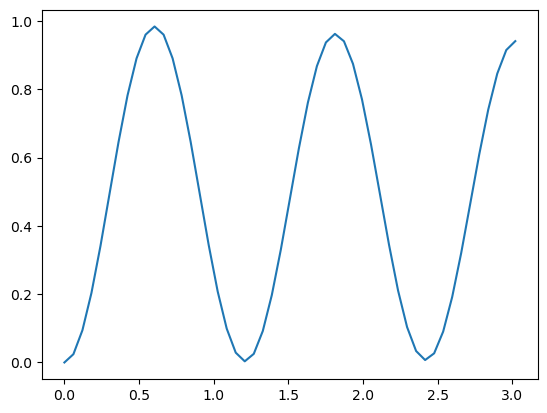

In [21]:
figure()
plot(tspan, real(expect(r ⊗ dagger(r), ρ_mean)))
plot(tspan, real(expect(r ⊗ dagger(r), ρ_mean_parllel)))
gcf()

In [5]:
tspan = [0.0:T0/20:2.5*T0;];
@time simulation(
    tspan, ψ0, 
    
    atom_params,
    trap_params,
    samples,
    
    f,
    red_laser_phase_amplitudes,
    blue_laser_phase_amplitudes,
    
    red_laser_params,
    blue_laser_params,
    
    detuning_params,
    decay_params
);

 33.819570 seconds (142.80 M allocations: 4.873 GiB, 2.77% gc time)


In [7]:
tspan = [0.0:T0/20:2.5*T0;];
@time ColdAtoms.simulation_parallel(
    tspan, ψ0, 
    
    atom_params,
    trap_params,
    samples,
    
    f,
    red_laser_phase_amplitudes,
    blue_laser_phase_amplitudes,
    
    red_laser_params,
    blue_laser_params,
    
    detuning_params,
    decay_params
);

  0.000068 seconds (1.05 k allocations: 145.547 KiB)


In [ ]:
100 * 0.15